### Identify the factors that predictions user adoption.

Adopted Users were defined as users who logged into the product on three separate days within a seven day period span. To determine which factors mostly attributed to an adopted user, user ids were queried such that they logged in on three different days within the same week. This could be done using resample method or the Grouper method. Looking at the characteristics from all the adopted users in the dataset, the following list the trends that were discovered.

1. Adopted Users created their accounts in this order: Organization invite, group invite, signup, google, personal projects.

2. Most Adopted Users created their accounts in 2013.

3. About 60% chose to opted out of receiving marketing emails.

4. About 84% chose disable marketing drip.

5. The following ordered list contains the organization ids that has the most adopted users from the dataset: 7, 1, 2, 
 9, 13, 3, 62, 5, 4, 0.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
pd.options.display.max_columns = None

In [3]:
#read in both tables
df_user = pd.read_csv('takehome_users.csv', encoding = 'latin-1')
df_engagement = pd.read_csv('takehome_user_engagement.csv')

In [4]:
df_user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
#changing time_stamp to be of type datetime
df_engagement['time_stamp'] = pd.to_datetime(df_engagement.time_stamp)

In [6]:
df_engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
time_stamp    207917 non-null datetime64[ns]
user_id       207917 non-null int64
visited       207917 non-null int64
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
#filter out the engagement users that has logged on less than 3 times altogether
temp = df_engagement.set_index('user_id')[df_engagement.groupby('user_id').count() > 3].dropna()
temp.reset_index(inplace = True)

In [8]:
temp.head()

,user_id,time_stamp,visited
0,2,2013-11-15 03:45:04,1.0
1,2,2013-11-29 03:45:04,1.0
2,2,2013-12-09 03:45:04,1.0
3,2,2013-12-25 03:45:04,1.0
4,2,2013-12-31 03:45:04,1.0


In [9]:
#this way uses the Grouper method to group data by the 7-day period time frame
x = temp.groupby(['user_id', pd.Grouper(key = 'time_stamp', freq = 'W')]).count()

In [10]:
#this method uses the resample function 
temp.set_index('time_stamp').groupby('user_id').resample('W').count()

In [11]:
#append to the list user_id such that each user has logged in 3 seperate times in a 7 day period
user_id = []
for idx, count in x.iterrows():
    if count[0] >= 3:
        user_id.append(idx[0])

#making all elements in the list distinct
user_id = list(set(user_id))

In [12]:
#filtered dataframe
df_uf = df_user[df_user.object_id.isin(user_id)]

In [13]:
df_uf

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
9,10,2013-01-16 22:08:03,Santos Carla,CarlaFerreiraSantos@gustr.com,ORG_INVITE,1.401833e+09,1,1,318,4143.0
19,20,2014-03-06 11:46:38,Helms Mikayla,lqyvjilf@uhzdq.com,SIGNUP,1.401364e+09,0,0,58,NaN
32,33,2014-03-11 06:29:09,Araujo José,JoseMartinsAraujo@cuvox.de,GUEST_INVITE,1.401518e+09,0,0,401,79.0
41,42,2012-11-11 19:05:07,Pinto Giovanna,GiovannaCunhaPinto@cuvox.de,SIGNUP,1.401045e+09,1,0,235,NaN
42,43,2012-12-31 07:13:17,Gomes Beatrice,vgqmpljq@yyyxt.com,GUEST_INVITE,1.366010e+09,0,0,63,149.0
52,53,2013-02-09 23:47:15,Ribeiro Camila,CamilaGomesRibeiro@gmail.com,GUEST_INVITE,1.367798e+09,0,0,37,3641.0
62,63,2012-12-20 16:30:52,Martins Leonor,LeonorAraujoMartins@gmail.com,SIGNUP_GOOGLE_AUTH,1.401899e+09,0,0,203,NaN
68,69,2012-06-29 10:15:18,Bowen Alisha,AlishaBowen@gustr.com,GUEST_INVITE,1.401445e+09,0,0,107,5022.0
73,74,2013-01-14 00:02:41,Farrell Jack,JackFarrell@gmail.com,SIGNUP_GOOGLE_AUTH,1.377303e+09,0,0,89,NaN


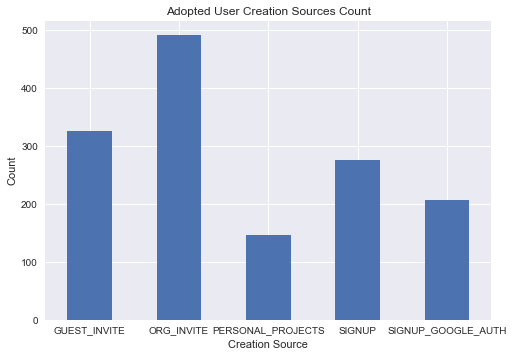

In [14]:
#Adopted Users Creation Sources
df_uf.groupby('creation_source').count()['name'].plot(kind = 'bar',legend = False)
plt.title('Adopted User Creation Sources Count')
plt.xticks(rotation = 0)
plt.xlabel('Creation Source')
plt.ylabel('Count')
plt.show()

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


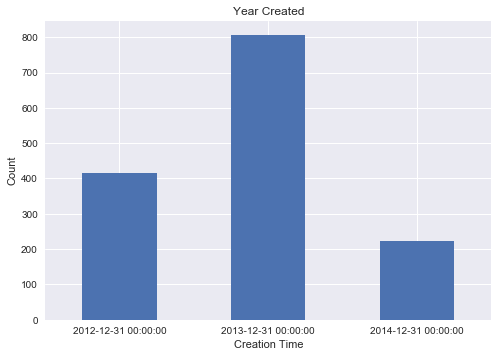

In [15]:
#plot of when most of the adopted users created their account
df_uf['creation_time'] = pd.to_datetime(df_user.creation_time)
df_uf.set_index('creation_time').resample('A')['name'].count().plot(kind='bar',legend = False)
plt.xticks(rotation = 0)
plt.xlabel('Creation Time')
plt.ylabel('Count')
plt.title('Year Created')
plt.show()

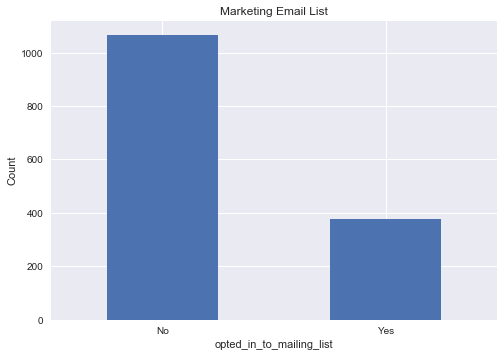

In [16]:
#opted into mailing list
df_uf.groupby('opted_in_to_mailing_list')['name'].count().plot(kind = 'bar')
plt.title('Marketing Email List')
plt.ylabel('Count')
plt.xticks(range(0,2), ('No', 'Yes'), rotation = 0)
plt.show()

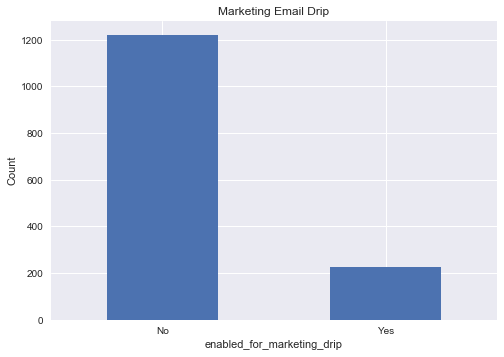

In [17]:
#enabled to email marketing drip
df_uf.groupby('enabled_for_marketing_drip')['name'].count().plot(kind = 'bar')
plt.title('Marketing Email Drip')
plt.ylabel('Count')
plt.xticks(range(0,2), ('No', 'Yes'), rotation = 0)
plt.show()

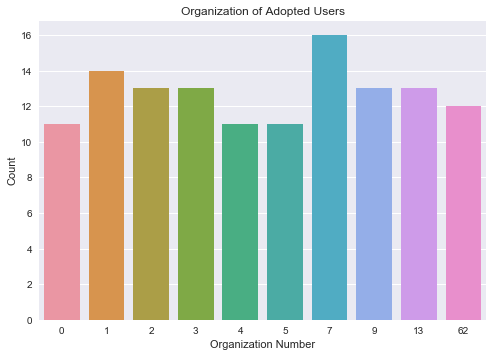

In [18]:
#retrieving the top 10 organization that has the most adopted users
import collections

top_10_org_id= sorted(dict(collections.Counter(df_uf.org_id)).items(), key = lambda x:x[1], reverse = True)[:10]

#unpacking the org number and the count
x = []
y = []
for org, count in top_10_org_id:
    x.append(org)
    y.append(count)

#barplot of the graph
sns.barplot(x = x, y=y)
plt.title('Organization of Adopted Users')
plt.xlabel('Organization Number')
plt.ylabel('Count')
plt.show()

In [19]:
top_10_org_id

[(7, 16),
 (1, 14),
 (2, 13),
 (9, 13),
 (13, 13),
 (3, 13),
 (62, 12),
 (5, 11),
 (4, 11),
 (0, 11)]